In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from collections import Counter

In [41]:
df = pd.read_csv('jigsaw.csv')

nombre_lignes = 100000
df = df.head(nombre_lignes)

jigsaw_csv = 'jigsaw'+str(nombre_lignes)+'.csv'
df.to_csv(jigsaw_csv, index=False)

df

C:\Users\rapha\AppData\Local\Temp\ipykernel_4928\2713916140.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('jigsaw.csv')


,Unnamed: 0,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,dataset,comment_text_processed
0,0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0.0,0.0,0.0,0.0,0.0,0.0,toxic_comment,explanation why the edits made under my userna...
1,1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0.0,0.0,0.0,0.0,0.0,0.0,toxic_comment,d'aww he matches this background colour i'm se...
2,2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0.0,0.0,0.0,0.0,0.0,0.0,toxic_comment,hey man i'm really not trying to edit war it's...
3,3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0.0,0.0,0.0,0.0,0.0,0.0,toxic_comment,more i can't make any real suggestions on impr...
4,4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0.0,0.0,0.0,0.0,0.0,0.0,toxic_comment,you sir are my hero any chance you remember wh...
...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,172e07f9ab48bb39,"My reference is a book, The Kemantney Language...",0.0,0.0,0.0,0.0,0.0,0.0,toxic_comment,my reference is a book the kemantney language ...
99996,99996,172e16e4f8de66fe,"""::: because there is 8 lines of text in the t...",0.0,0.0,0.0,0.0,0.0,0.0,toxic_comment,because there is lines of text in the three ot...
99997,99997,1730ef89d087b7c8,"""\n\nIt says """"in"""" the country, not """"of"""" th...",0.0,0.0,0.0,0.0,0.0,0.0,toxic_comment,it says in the country not of the country
99998,99998,1731c1aae5f1cb32,"Renata, if you go on any Russian website you w...",0.0,0.0,0.0,0.0,0.0,0.0,toxic_comment,renata if you go on any russian website you wi...


In [42]:
new_toxic_percentage = ((df['toxic'] > 0) | (df['severe_toxic'] > 0) | (df['obscene'] > 0) | (df['threat'] > 0) | (df['insult'] > 0) | (df['identity_hate'] > 0)).sum() / len(df)
print(f"Nouveau pourcentage de commentaires toxiques : {new_toxic_percentage * 100:.2f}%")

Nouveau pourcentage de commentaires toxiques : 10.19%


In [43]:
# récup des commentaires toxiques
total_toxic_comments = ((df['toxic'] > 0) | (df['severe_toxic'] > 0) | (df['obscene'] > 0) | (df['threat'] > 0) | (df['insult'] > 0) | (df['identity_hate'] > 0)).sum()

# calcul du nombre de commentaires à suppr (pour atteindre 40% de toxiques)
pourcentage_toxic = 0.4
target_total_comments = total_toxic_comments / pourcentage_toxic
comments_to_remove = len(df) - target_total_comments

# selection et suppr de commentaires non-toxiques
non_toxic_indices = df[~((df['toxic'] > 0) | (df['severe_toxic'] > 0) | (df['obscene'] > 0) | (df['threat'] > 0) | (df['insult'] > 0) | (df['identity_hate'] > 0))].index
comments_to_remove_indices = non_toxic_indices[:int(comments_to_remove)]
df_balanced = df.drop(comments_to_remove_indices)

# afficher les pourcentages dans le nouveau df
new_toxic_percentage = ((df_balanced['toxic'] > 0) | (df_balanced['severe_toxic'] > 0) | (df_balanced['obscene'] > 0) | (df_balanced['threat'] > 0) | (df_balanced['insult'] > 0) | (df_balanced['identity_hate'] > 0)).sum() / len(df_balanced)
print(f"Nouveau pourcentage de commentaires toxiques : {new_toxic_percentage * 100:.2f}%")

Nouveau pourcentage de commentaires toxiques : 40.00%


In [44]:
df = df_balanced

In [45]:
df['score'] = df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1)
df = df.sort_values(by='score', ascending=False)
corr_matrix = df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].corr()

df[['id', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'comment_text_processed', 'score']]

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_text_processed,score
82141,dbbbb42bc096d8dc,1.0,1.0,1.0,1.0,1.0,1.0,help if you become an admin i will fuck find y...,6.0
38513,66c3bced1735cb90,1.0,1.0,1.0,1.0,1.0,1.0,am going to rape you in the ass you fat bitch ...,6.0
65075,ae1b1f693e4913b5,1.0,1.0,1.0,1.0,1.0,1.0,faggot s yo fuck it was fuck hayes you faggot ...,6.0
1017,02c6e41e4b317ac3,1.0,1.0,1.0,1.0,1.0,1.0,wouldn't be the first time bitch fuck you i'll...,6.0
29968,4f95394c7229f84c,1.0,1.0,1.0,1.0,1.0,1.0,u motherfukkin bitch i want to rape you smelly...,6.0
...,...,...,...,...,...,...,...,...,...
89030,ee27382abd9834c2,0.0,0.0,0.0,0.0,0.0,0.0,i'm not really sure there's more to explain ge...,0.0
89031,ee2769bcd91932cd,0.0,0.0,0.0,0.0,0.0,0.0,i do it's a diversionary tactic since the writ...,0.0
89032,ee2984fbf8f3d63d,0.0,0.0,0.0,0.0,0.0,0.0,making diffs hi i came across your post on the...,0.0
89033,ee2a0c8459c06a21,0.0,0.0,0.0,0.0,0.0,0.0,don't leave you are out donald trump someone n...,0.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


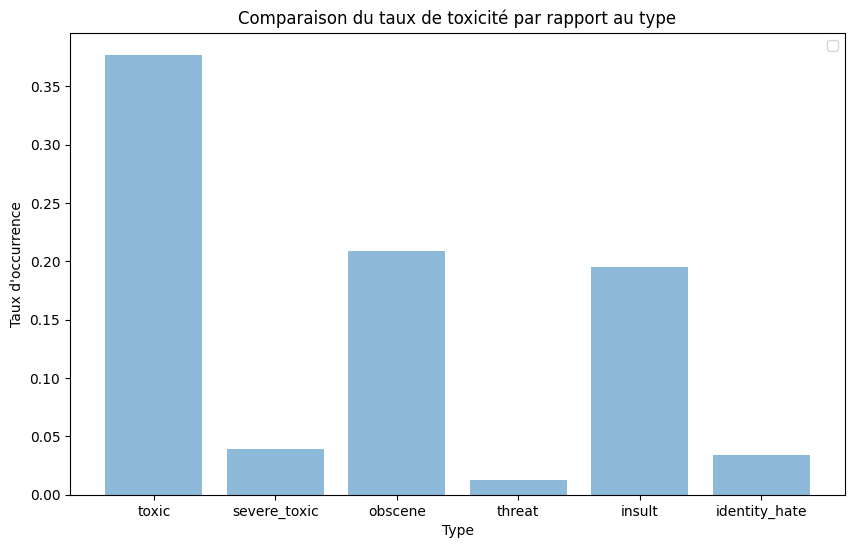

In [46]:
df['score'] = df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1)

toxicity_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
toxicity_df = df[toxicity_columns]

occurrence_rates = toxicity_df.sum() / len(df)

plt.figure(figsize=(10, 6))
plt.bar(occurrence_rates.index, occurrence_rates.values, alpha=0.5)

plt.xlabel('Type')
plt.ylabel('Taux d\'occurrence')
plt.legend()
plt.title('Comparaison du taux de toxicité par rapport au type')
plt.show()

In [47]:
# Enlève ponctuation, stop words (determinants), etc...
def process_text(text):
    doc = nlp(text)
    simplified_text = " ".join([token.lemma_ for token in doc if not token.is_punct and not token.is_stop and not token.is_digit])
    return simplified_text

nlp = spacy.load("en_core_web_sm")
cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

most_common_words = {}

for col in cols:
    filtered_df = df[df[col] == 1]
    text_to_analyze = " ".join(filtered_df['comment_text_processed'])
    segment_size = 500000

    segments = [text_to_analyze[i:i+segment_size] for i in range(0, len(text_to_analyze), segment_size)]
    preprocessed_text = " ".join([process_text(segment) for segment in segments])

    tokens = preprocessed_text.split()

    word_counts = Counter(tokens)
    most_common_word, most_common_count = word_counts.most_common(1)[0]
    most_common_words[col] = most_common_word

print("Mots les plus récurrents pour chaque type de toxicité :")
print(most_common_words)


Mots les plus récurrents pour chaque type de toxicité :
{'toxic': 'fuck', 'severe_toxic': 'fuck', 'obscene': 'fuck', 'threat': 'die', 'insult': 'fuck', 'identity_hate': 'nigger'}


Nombre de caractères moyen pour chaque type de toxicité :
{'toxic': 280.5153974198918, 'severe_toxic': 430.4224224224224, 'obscene': 276.17176647268633, 'threat': 299.8980891719745, 'insult': 257.5302999798671, 'identity_hate': 318.9473067915691}


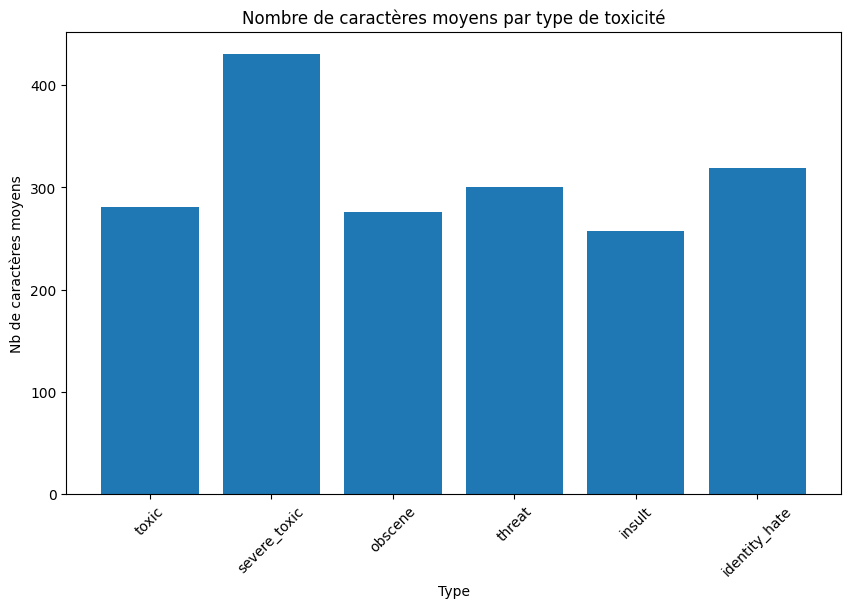

In [48]:
toxicity_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

average_lengths = {}

for col in toxicity_columns:
    filtered_df = df[df[col] == 1]

    # Longueur moyenne des commentaires
    avg_len = filtered_df['comment_text_processed'].apply(len).mean()
    average_lengths[col] = avg_len

print("Nombre de caractères moyen pour chaque type de toxicité :")
print(average_lengths)

toxicity_columns = list(average_lengths.keys())
average_length_values = list(average_lengths.values())

plt.figure(figsize=(10, 6))
plt.bar(toxicity_columns, average_length_values)
plt.xlabel('Type')
plt.ylabel('Nb de caractères moyens')
plt.title('Nombre de caractères moyens par type de toxicité')
plt.xticks(rotation=45)

plt.show()

In [73]:
nlp = spacy.load("en_core_web_sm")
stopwords = nlp.Defaults.stop_words

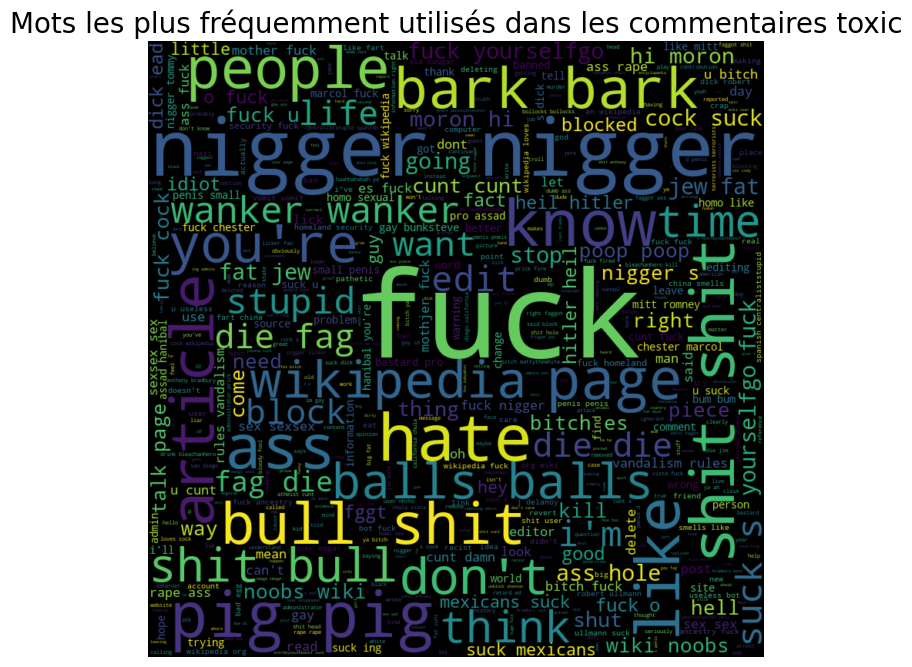

In [84]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

toxic_mask = Image.open("./images/toxic.png")
toxic_mask = toxic_mask.resize((800, 800))
toxic_mask = np.array(toxic_mask)

subset = df[df['toxic'] == 1]
text = " ".join(subset['comment_text_processed'])

wc = WordCloud(
    background_color="black",
    max_words=4000,
    mask=toxic_mask,
    stopwords=stopwords
)
wc.generate(text)

plt.figure(figsize=(8, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title(f"Mots les plus fréquemment utilisés dans les commentaires toxic", fontsize=20)
plt.show()

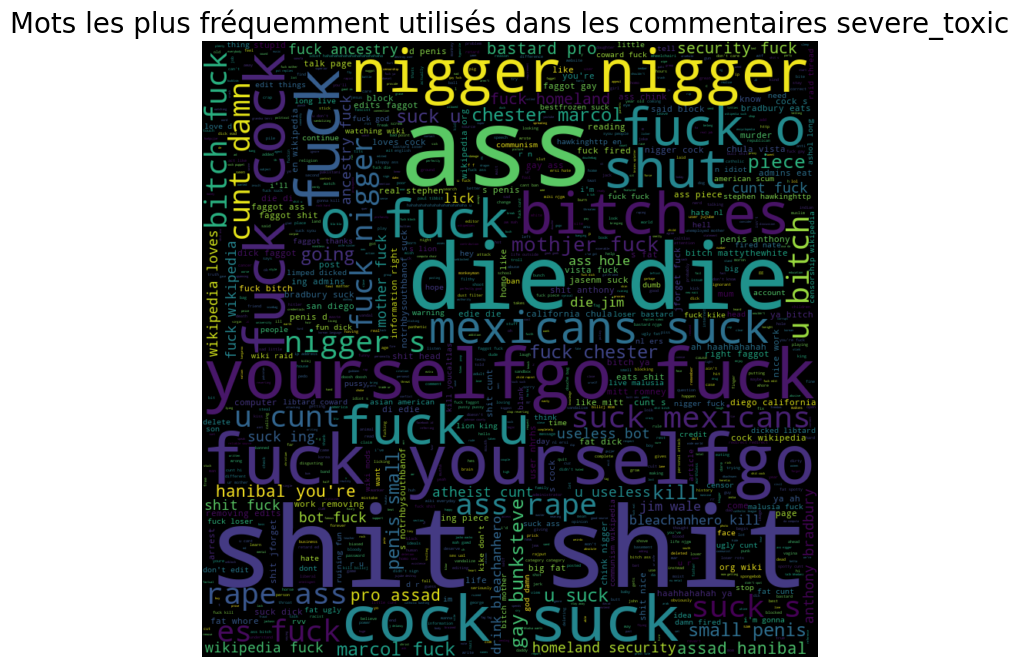

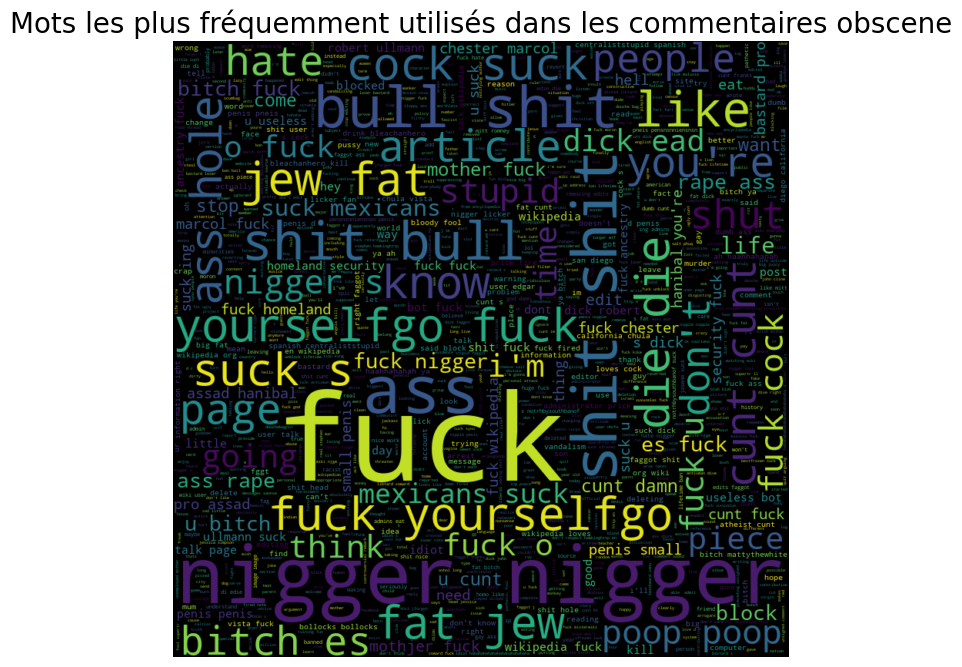

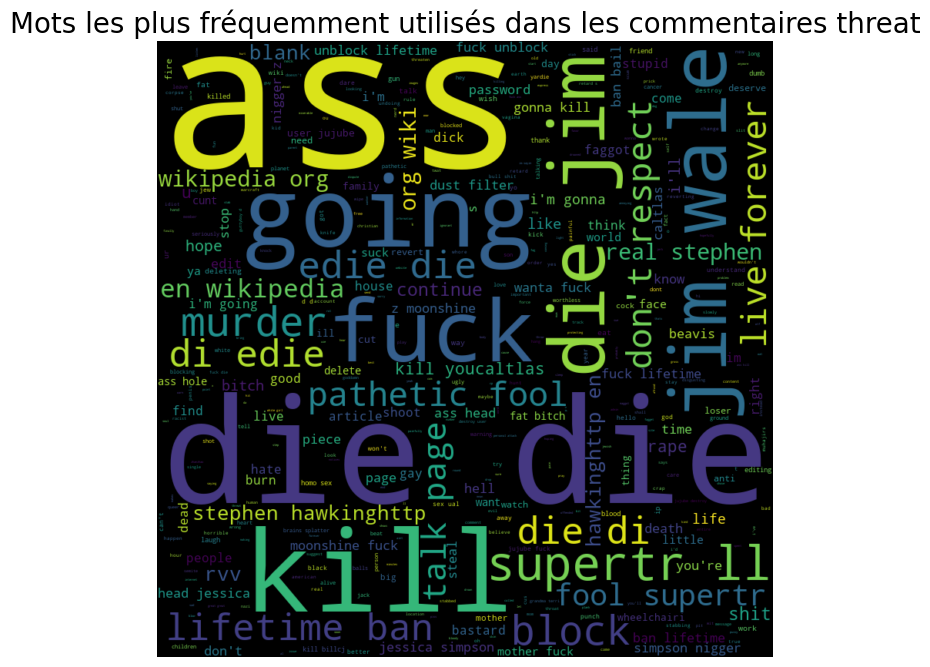

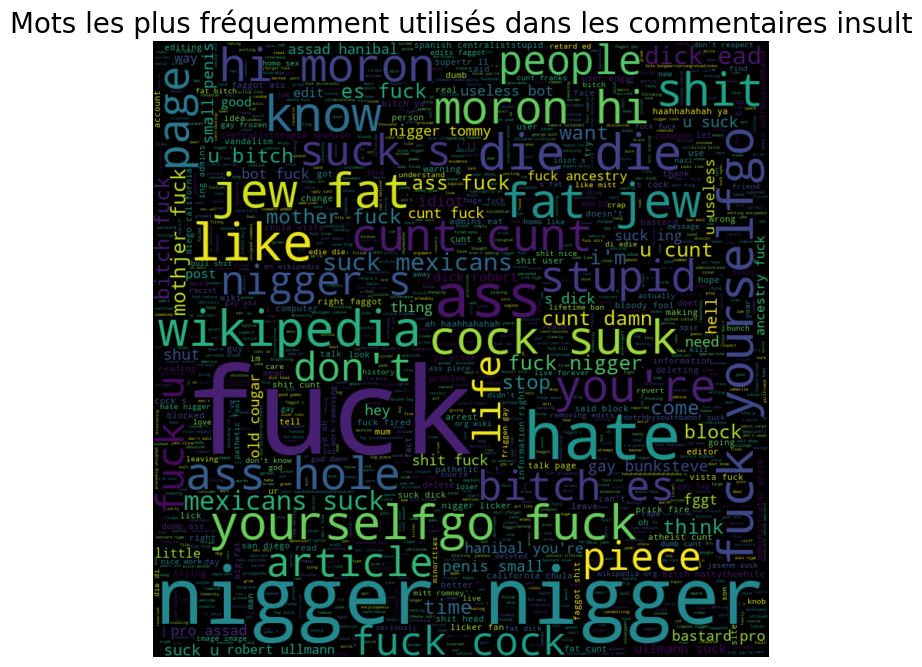

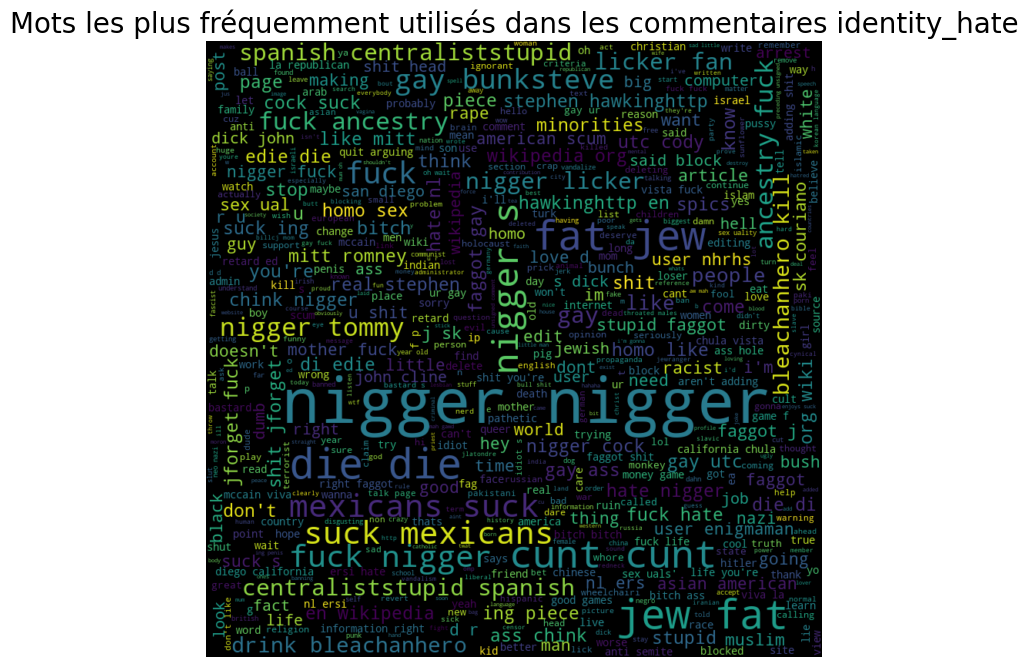

In [82]:
toxicity_types = ["obscene", "threat", "insult", "identity_hate"]

for toxicity_type in toxicity_types:
    mask_filename = f"./images/toxic.png"
    toxicity_mask = Image.open(mask_filename)
    toxicity_mask = toxicity_mask.resize((800, 800))
    toxicity_mask = np.array(toxicity_mask)

    subset = df[df[toxicity_type] == 1]
    text = " ".join(subset['comment_text_processed'])

    wc = WordCloud(
        background_color="black",
        max_words=4000,
        mask=toxicity_mask,
        stopwords=stopwords
    )
    wc.generate(text)

    plt.figure(figsize=(8, 8))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Mots les plus fréquemment utilisés dans les commentaires {toxicity_type}", fontsize=20)
    plt.show()

In [49]:
X = df['comment_text_processed']
Y = df['toxic']

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Créer un transformateur TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=10000)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

#### Evaluation du modèle LogisticRegression

Sélection des données :

Vous devez utiliser la colonne comment_text_processed comme caractéristique (X) car vous souhaitez prédire la toxicité en fonction du texte du commentaire.
La cible (Y) sera la colonne toxic.
Prétraitement des données :

Assurez-vous que le texte du commentaire est correctement prétraité en utilisant des techniques telles que la tokenisation, la suppression des mots vides, la lemmatisation, etc.
Division des données en ensembles d'entraînement et de test :

Utilisez la fonction train_test_split pour diviser vos données en ensembles d'entraînement et de test.
Encodage des données :

Vous devez encoder les textes en nombres pour qu'ils puissent être utilisés dans un modèle de machine learning. Vous pouvez utiliser des techniques telles que TF-IDF (Term Frequency-Inverse Document Frequency) ou des plongements de mots (Word Embeddings).
Entraînement du modèle :

Choisissez un modèle approprié pour la classification de texte, par exemple, un modèle de classification binaire comme la régression logistique.
Prédiction et évaluation :

Effectuez des prédictions sur l'ensemble de test à l'aide du modèle entraîné.
Évaluez la performance du modèle en utilisant des métriques de classification, telles que la précision, le rappel, la F1-score, et la courbe ROC.

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr_model = LogisticRegression()

lr_model.fit(X_train_tfidf, Y_train)
predictions = lr_model.predict(X_test_tfidf)

accuracy = accuracy_score(Y_test, predictions)
report = classification_report(Y_test, predictions)

print(f'Précision du modèle : {accuracy:.2f}')
# print(f'Rapport de classification :\n{report}')

Précision du modèle : 0.89


Ce code utilisent la régression linéaire et le gradient boosting pour effectuer des tâches de régression. Cependant, ces modèles ne sont pas appropriés pour des tâches de classification, comme la prédiction de toxicité de commentaires.

La régression linéaire et le gradient boosting sont des modèles de régression, et ils visent à prédire des valeurs numériques continues (comme les prix, les scores, etc.), ce qui n'est pas le cas de la prédiction de toxicité (une classification binaire : toxique ou non toxique).

Pour une tâche de classification, vous devriez utiliser des modèles de classification appropriés, tels que la régression logistique, les arbres de décision, les forêts aléatoires, ou les modèles de réseaux de neurones, en fonction de la complexité de votre tâche.

#### Entrainement du modèle LinearRegression

In [57]:
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split

# scaler = MinMaxScaler()
# columns = ['toxic', 'severe_toxic']

# for col in columns:
#     X[col] = scaler.fit_transform(X[[col]])

# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


#### Evaluation du modèle LinearRegression

In [56]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score

# lr = LinearRegression()
# lr.fit(X_train, Y_train)
# lr_pred = lr.predict(X_test)
# lr_score = r2_score(Y_test, lr_pred)
# print('Précision du modèle linéaire : {:.2%}'.format(lr_score))

#### Evaluation du modèle GradientBoostingRegressor

In [55]:
# from sklearn.ensemble import GradientBoostingRegressor

# gbr = GradientBoostingRegressor()
# gbr.fit(X_train, Y_train)

# gbr_pred = gbr.predict(X_test)
# gbr_score = r2_score(Y_test, gbr_pred)
# print('Précision du modèle Gradient Boosting : {:.2%}'.format(gbr_score))